# 2 - Beginner - Time Resolved Albedo
### Generate and Plot Time Resolved SMARTS Albedo
***

This journal will walk through the generation of spectral albedo profiles with pySMARTS. The primary focus is on time-resolved albedo, so we will be generating and plotting these reflectance profiles for the same ground material in the same location for varying hours of the day. To close the journal is a brief look at Zonal and Local ground reflectance. The demo location is Golden, Colorado.

Contents:
<ol>
    <li> <a href='#s1'> Define Necessary Variables </a></li>
    <li> <a href='#s2'> Generate Spectral Albedo </a></li>
    <li> <a href='#s3'> Plot Albedo </a></li>
    <li> <a href='#s4'> Zonal vs. Local Ground Reflectance </a>
</ol>
    

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pySMARTS

# plotting paramters
# these are visual changes only and have no bearing on the use of pySMARTS
plt.rcParams['timezone'] = 'Etc/GMT+7'
font = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 14}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (12, 5)

<a id='s1'></a>

### 1. Necessary Variables

For pySMARTS, all variables are maintained as strings. For any simulation, we need to define the following:

- **Output Type**: string of space separated integers. See *main.py* for the full list. This can be DNI, DHI, GHI, Alb, and more.

- **Date and Time**: in strings, we need year, month, day, and hour. Each field should be in 2-digit strings padded with zeroes, except year, which is 4 digits. Example: 2 pm on May 21th 2021 is defined as `YEAR='2020', MONTH='05',DAY='21',HOUR='14'`

- **Location**: Latitude, Longitude, Altitude (in km) and timezone ($\pm$ from UTM)

- **Ground Material**: See *main.py* for the complete list of available ground materials. Common examples: Soil, Concrete, Grass, DryGrass, Snow

In [48]:
# Specify Desired Output
IOUT = '30 31' # Zonal and Local Ground Reflectance

# Define Date, Time, and Location (ex: Golden, CO)
YEAR = '2021'
MONTH = '05'
DAY = '21'
HOUR = '14'
LATIT = '39.7'
LONGIT = '-105'
ALTIT = '1.7' # km above sea level
ZONE = '-7' # Timezone
MAT = 'Soil'

<a id='s2'></a>

### 2. Generate Spectral Albedo

When using pySMARTS directly, we will call the `SMARTSTimeLocation()` funciton. This uses the variables we defined above in the order they were defined. 
A few notes:
- `MAT` is optional and will default to the "*LiteSoil*" ground material.
- `SMARTSTimeLocation()` may halt with the error:

    `EmptyDataError: No columns to parse from file`.
 
    This will happen when requesting data for any hour of the day with insufficient light. In the example below, if we pass `HOUR='04'` (4:00 am), the script would halt with this error.


For the example below, we will call the function for three different hours in the day and store them as explicit variables.

In [49]:
# Albedo at 8am
demo08 = pySMARTS.SMARTSTimeLocation(IOUT=IOUT, YEAR=YEAR, MONTH=MONTH, DAY=DAY, HOUR='08',
                                    LATIT=LATIT, LONGIT=LONGIT, ALTIT=ALTIT, ZONE=ZONE, material=MAT)

# Albedo at 12pm (noon)
demo12 = pySMARTS.SMARTSTimeLocation(IOUT=IOUT, YEAR=YEAR, MONTH=MONTH, DAY=DAY, HOUR='12',
                                    LATIT=LATIT, LONGIT=LONGIT, ALTIT=ALTIT, ZONE=ZONE, material=MAT)

# Albedo at 4pm
demo16 = pySMARTS.SMARTSTimeLocation(IOUT=IOUT, YEAR=YEAR, MONTH=MONTH, DAY=DAY, HOUR='16',
                                    LATIT=LATIT, LONGIT=LONGIT, ALTIT=ALTIT, ZONE=ZONE, material=MAT)

<a id='s3'></a>

### 3. Plotting the Albedo

Next we'll look at the plotted albedo from the hours generated. We'll do this side by side, then overlaid. Finally, we'll take a look at all the daylight hours simultaneously.

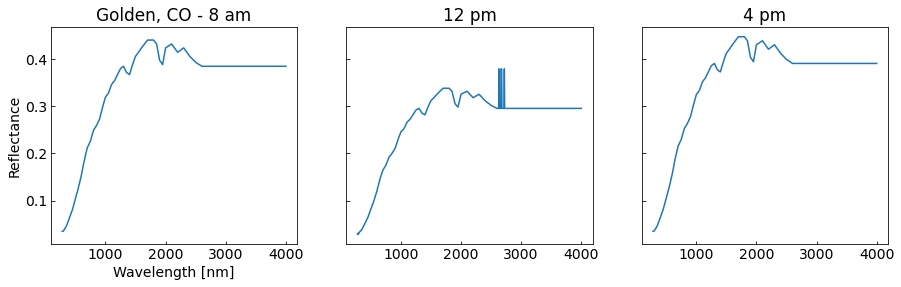

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,4))
for axs in ax:
    axs.tick_params(direction='in')
ax[0].set_title('Golden, CO - 8 am')
ax[0].plot(demo08.Wvlgth, demo08.Zonal_ground_reflectance)

ax[1].set_title('12 pm')
ax[1].plot(demo12.Wvlgth, demo12.Zonal_ground_reflectance)

ax[2].set_title('4 pm')
ax[2].plot(demo16.Wvlgth, demo16.Zonal_ground_reflectance)

ax[0].set_ylabel('Reflectance')
ax[0].set_xlabel('Wavelength [nm]')
plt.show()

Next, we'll overlay two hours on the same axis

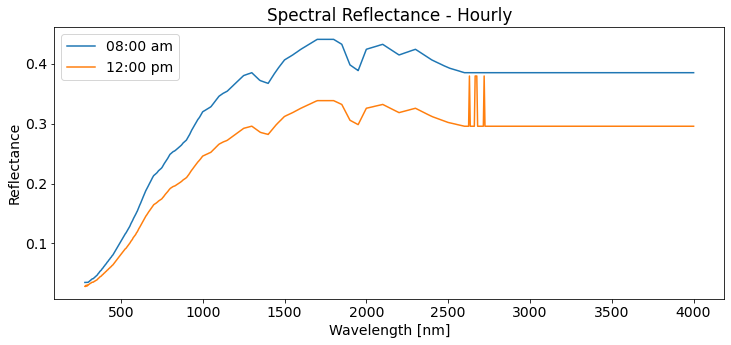

In [51]:
plt.plot(demo08.Wvlgth,demo08.Zonal_ground_reflectance,label='08:00 am')
plt.plot(demo12.Wvlgth,demo12.Zonal_ground_reflectance,label='12:00 pm')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectance')
plt.title('Spectral Reflectance - Hourly')
plt.legend()
plt.show()

Finally, let's take a look at the generated spectral albedo for all dalylight hours. 

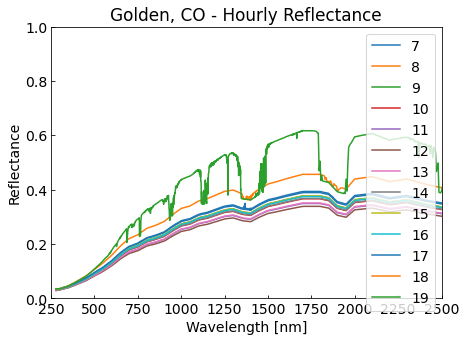

In [52]:
times = np.arange(7,20)
DF = pd.DataFrame(index=demo08.index)
DF['Wvlgth'] = demo08.Wvlgth
DL = DF.copy()
for t in times:    
    tmp = pySMARTS.SMARTSTimeLocation(IOUT=IOUT, YEAR=YEAR, MONTH=MONTH, DAY=DAY, HOUR=f'{t:02}',
                                        LATIT=LATIT, LONGIT=LONGIT, ALTIT=ALTIT, ZONE=ZONE, material=MAT)
    DF[t] = tmp.Zonal_ground_reflectance
    DL[t] = tmp.Local_ground_reflectance

fig = plt.figure(figsize=(7,5))
plt.ylim(0,1.0)
plt.xlim(250,2500)
plt.tick_params(direction='in')
for col in DL.columns[1:]:
    plt.plot(DL.Wvlgth,DL[col],label=col)
plt.legend()
plt.title('Golden, CO - Hourly Reflectance')
plt.ylabel('Reflectance')
plt.xlabel('Wavelength [nm]')
plt.show()

<a id='s4'></a>

### 4. Zonal vs Local Ground Reflectance

Here we compare the two types of albedo available in pySMARTS.

- **Zonal**: `IOUT = '30'` This is the albedo most applicable in applications $\geq$ 10 $km^2$

- **Local**: `IOUT = '31'` Use this albedo for smaller views $<$ 10 $km^2$ 

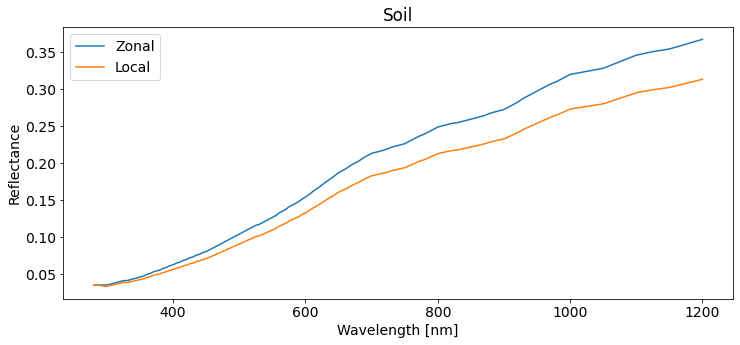

In [53]:
vDZ = DF[DF.Wvlgth<=1200]
vDL = DL[DL.Wvlgth<=1200]
plt.plot(vDZ.Wvlgth,vDZ[8],label='Zonal')
plt.plot(vDL.Wvlgth,vDL[8],label='Local')
plt.title(MAT)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

Finally, let's show the same comparison with a different ground material. Below is the Zonal and Local reflectance for snow.

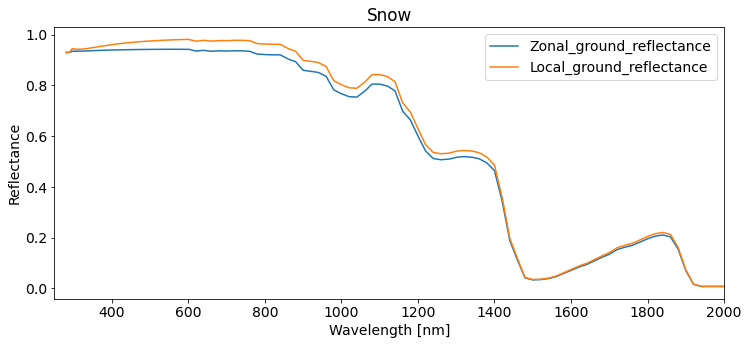

In [54]:
demo = pySMARTS.SMARTSTimeLocation(IOUT=IOUT, YEAR=YEAR, MONTH=MONTH, DAY=DAY, HOUR='08',
                                    LATIT=LATIT, LONGIT=LONGIT, ALTIT=ALTIT, ZONE=ZONE, material='Snow')
for col in demo.columns[1:]:
    plt.plot(demo.Wvlgth,demo[col],label=col)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectance')
plt.title('Snow')
plt.xlim(250,2000)
plt.legend()
plt.show()